# Module 5: Clustering et Réduction de Dimension

## 5.1 Clustering

### K-means

K-means est un algorithme de clustering non supervisé qui vise à partitionner n observations en k clusters, où chaque observation appartient au cluster dont la moyenne (centroïde) est la plus proche.

L'algorithme fonctionne de la manière suivante :

1.  Choisir k centroïdes initiaux aléatoirement.
2.  Assigner chaque observation au centroïde le plus proche.
3.  Recalculer les centroïdes en prenant la moyenne des observations de chaque cluster.
4.  Répéter les étapes 2 et 3 jusqu'à convergence (c'est-à-dire que les centroïdes ne changent plus ou que le nombre d'itérations maximal est atteint).

Voici un exemple en Python utilisant `scikit-learn` :

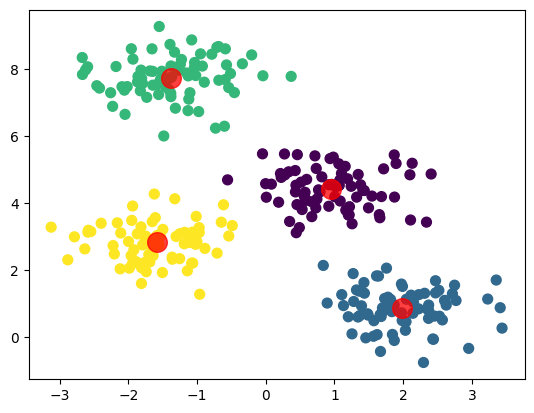

In [1]:
# filepath: c:\Users\michel.bertrand.mama\Documents\AYNID\clustering_dimension_reduction.ipynb
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

# Générer des données aléatoires pour l'exemple
X, y = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

# Créer un modèle K-means avec 4 clusters
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)

# Entraîner le modèle
kmeans.fit(X)

# Faire des prédictions
y_kmeans = kmeans.predict(X)

# Afficher les résultats
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75);
plt.show()

### Algorithme EM

L'algorithme EM (Expectation-Maximization) est un algorithme itératif utilisé pour estimer les paramètres d'un modèle probabiliste en présence de données manquantes ou de variables latentes. Il est souvent utilisé dans le contexte du clustering pour estimer les paramètres des distributions gaussiennes mixtes (Gaussian Mixture Models, GMM).

L'algorithme EM alterne entre deux étapes :

1.  **Expectation (E) :** Calculer la probabilité que chaque observation appartienne à chaque cluster en utilisant les paramètres actuels du modèle.
2.  **Maximization (M) :** Mettre à jour les paramètres du modèle (moyennes, covariances, poids) en maximisant la vraisemblance des données, en utilisant les probabilités calculées à l'étape E.

Voici un exemple en Python utilisant `scikit-learn` :

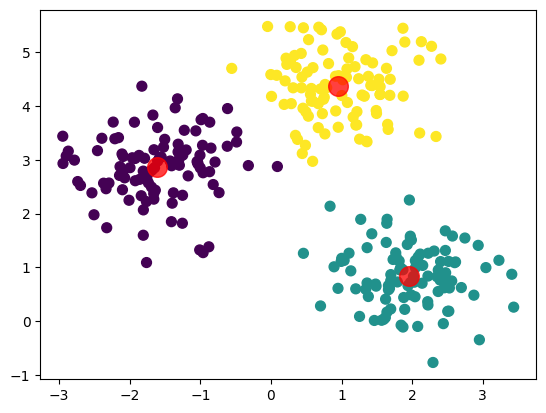

In [2]:
# filepath: c:\Users\michel.bertrand.mama\Documents\AYNID\clustering_dimension_reduction.ipynb
from sklearn.mixture import GaussianMixture
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np

# Générer des données aléatoires pour l'exemple
X, y = make_blobs(n_samples=300, centers=3, cluster_std=0.60, random_state=0)

# Créer un modèle GMM avec 3 clusters
gmm = GaussianMixture(n_components=3, random_state=0)

# Entraîner le modèle
gmm.fit(X)

# Faire des prédictions
y_gmm = gmm.predict(X)

# Afficher les résultats
plt.scatter(X[:, 0], X[:, 1], c=y_gmm, s=50, cmap='viridis')

# Afficher les centroïdes
centers = np.zeros((gmm.n_components, X.shape[1]))
for i in range(gmm.n_components):
    centers[i, :] = np.mean(X[y_gmm == i, :], axis=0)
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75);
plt.show()

### Choix du nombre de clusters

Le choix du nombre de clusters (k) est un problème important dans le clustering. Il existe plusieurs méthodes pour aider à choisir le nombre de clusters optimal :

*   **Méthode du coude (Elbow method) :** Tracer la variance expliquée en fonction du nombre de clusters et choisir le nombre de clusters où la courbe commence à se stabiliser (c'est-à-dire qu'il y a un "coude").
*   **Silhouette score :** Mesurer la similarité d'une observation à son propre cluster par rapport aux autres clusters. Choisir le nombre de clusters qui maximise le silhouette score moyen.
*   **Coefficient de Calinski-Harabasz :** Mesurer le rapport de la variance inter-clusters à la variance intra-cluster. Choisir le nombre de clusters qui maximise ce coefficient.

Voici un exemple en Python utilisant `scikit-learn` :

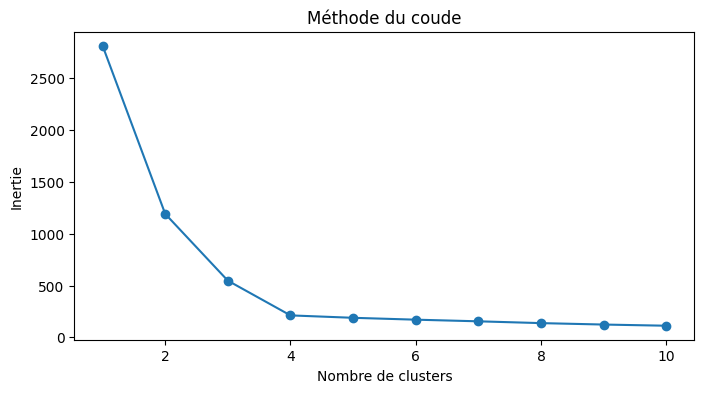

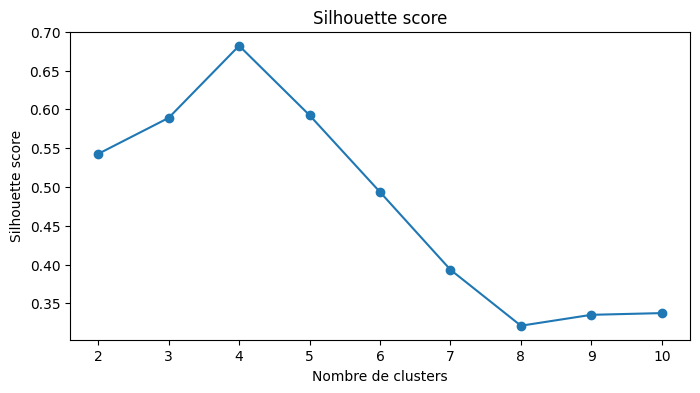

In [3]:
# filepath: c:\Users\michel.bertrand.mama\Documents\AYNID\clustering_dimension_reduction.ipynb
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

# Générer des données aléatoires pour l'exemple
X, y = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

# Méthode du coude
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Nombre de clusters')
plt.ylabel('Inertie')
plt.title('Méthode du coude')
plt.show()

# Silhouette score
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    silhouette_scores.append(silhouette_score(X, kmeans.labels_))

plt.figure(figsize=(8, 4))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Nombre de clusters')
plt.ylabel('Silhouette score')
plt.title('Silhouette score')
plt.show()

### Clustering hiérarchique

Le clustering hiérarchique est une méthode de clustering qui construit une hiérarchie de clusters. Il existe deux approches principales :

*   **Approche agglomérative (bottom-up) :** Chaque observation commence dans son propre cluster, puis les clusters les plus proches sont fusionnés itérativement jusqu'à ce qu'il ne reste qu'un seul cluster.
*   **Approche divisive (top-down) :** Toutes les observations commencent dans un seul cluster, puis le cluster est divisé itérativement en sous-clusters jusqu'à ce que chaque observation soit dans son propre cluster.

### Approches agglomératives et divisives

*   **Approche agglomérative :** Commence avec chaque point de données comme un cluster distinct, puis fusionne itérativement les clusters les plus proches jusqu'à ce qu'il ne reste qu'un seul cluster. Les méthodes de linkage (distance entre les clusters) courantes comprennent :
    *   **Single linkage :** Distance minimale entre les points des deux clusters.
    *   **Complete linkage :** Distance maximale entre les points des deux clusters.
    *   **Average linkage :** Distance moyenne entre les points des deux clusters.
    *   **Ward linkage :** Minimise la variance intra-cluster.
*   **Approche divisive :** Commence avec tous les points de données dans un seul cluster, puis divise itérativement les clusters en sous-clusters jusqu'à ce que chaque point de données soit dans son propre cluster.

Voici un exemple en Python utilisant `scikit-learn` :

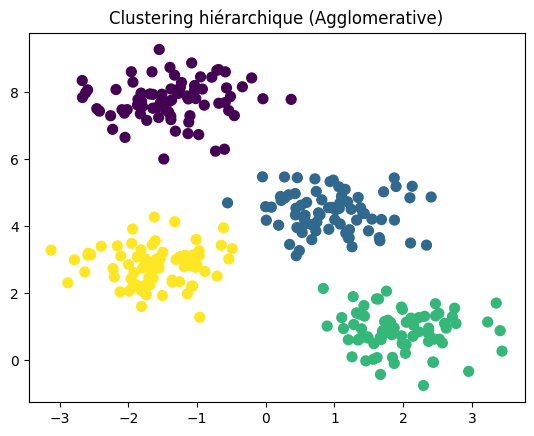

In [4]:
# filepath: c:\Users\michel.bertrand.mama\Documents\AYNID\clustering_dimension_reduction.ipynb
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

# Générer des données aléatoires pour l'exemple
X, y = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

# Créer un modèle de clustering agglomératif avec 4 clusters et linkage de Ward
hierarchical = AgglomerativeClustering(n_clusters=4, linkage='ward')

# Entraîner le modèle
y_hierarchical = hierarchical.fit_predict(X)

# Afficher les résultats
plt.scatter(X[:, 0], X[:, 1], c=y_hierarchical, s=50, cmap='viridis')
plt.title('Clustering hiérarchique (Agglomerative)')
plt.show()

### DBSCAN

DBSCAN (Density-Based Spatial Clustering of Applications with Noise) est un algorithme de clustering basé sur la densité qui regroupe les points qui sont proches les uns des autres. Il est capable de détecter des clusters de formes arbitraires et de détecter le bruit (outliers).

DBSCAN a deux paramètres principaux :

*   **eps :** Le rayon de voisinage autour d'un point.
*   **min_samples :** Le nombre minimal de points dans le voisinage d'un point pour qu'il soit considéré comme un point central.

Voici un exemple en Python utilisant `scikit-learn` :

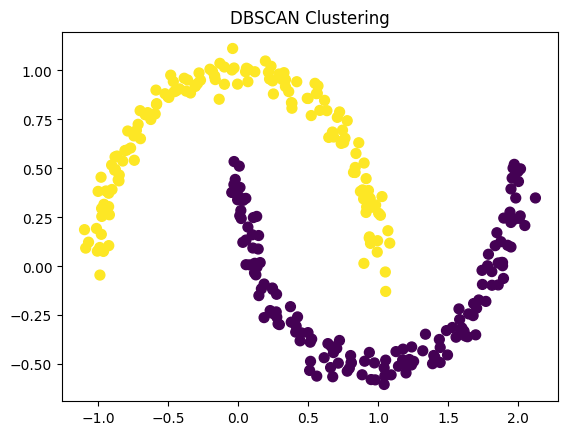

In [5]:
# filepath: c:\Users\michel.bertrand.mama\Documents\AYNID\clustering_dimension_reduction.ipynb
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt

# Générer des données aléatoires pour l'exemple (en forme de lunes)
X, y = make_moons(n_samples=300, noise=0.05, random_state=0)

# Créer un modèle DBSCAN
dbscan = DBSCAN(eps=0.3, min_samples=5)

# Entraîner le modèle
y_dbscan = dbscan.fit_predict(X)

# Afficher les résultats
plt.scatter(X[:, 0], X[:, 1], c=y_dbscan, s=50, cmap='viridis')
plt.title('DBSCAN Clustering')
plt.show()

### Détection de bruit et clusters de formes arbitraires

DBSCAN est particulièrement utile pour la détection de bruit (outliers) et le clustering de données avec des formes arbitraires, car il ne fait pas d'hypothèses sur la forme des clusters. Les points qui ne sont pas considérés comme des points centraux ou des points accessibles à partir d'un point central sont étiquetés comme bruit.

## 5.2 Réduction de Dimension

### Analyse en composantes principales (ACP)

L'analyse en composantes principales (ACP) est une technique de réduction de dimension linéaire qui transforme les données en un ensemble de composantes principales non corrélées. Les composantes principales sont ordonnées par ordre de variance expliquée, de sorte que les premières composantes principales capturent la plus grande partie de la variance des données.

L'ACP est utilisée pour réduire le nombre de features, visualiser les données en dimension inférieure, et supprimer le bruit.

Voici un exemple en Python utilisant `scikit-learn` :

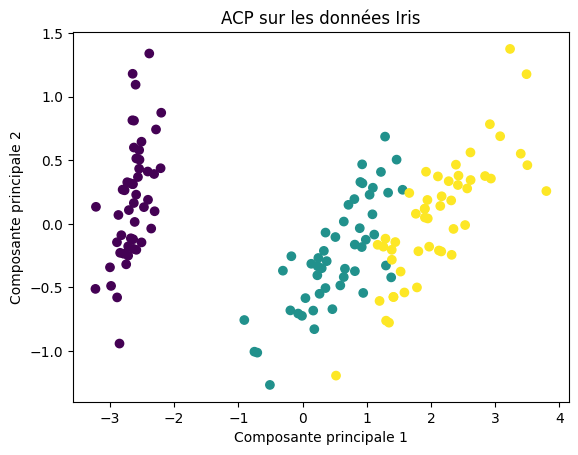

Variance expliquée par chaque composante principale: [0.92461872 0.05306648]


In [6]:
# filepath: c:\Users\michel.bertrand.mama\Documents\AYNID\clustering_dimension_reduction.ipynb
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

# Charger les données Iris
iris = load_iris()
X = iris.data
y = iris.target

# Créer un modèle PCA avec 2 composantes principales
pca = PCA(n_components=2)

# Entraîner le modèle
X_pca = pca.fit_transform(X)

# Afficher les résultats
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis')
plt.xlabel('Composante principale 1')
plt.ylabel('Composante principale 2')
plt.title('ACP sur les données Iris')
plt.show()

# Variance expliquée par chaque composante principale
print("Variance expliquée par chaque composante principale:", pca.explained_variance_ratio_)

### Décomposition en valeurs singulières (SVD)

La décomposition en valeurs singulières (SVD) est une technique de factorisation matricielle qui décompose une matrice en trois matrices :

*   **U :** Une matrice orthogonale dont les colonnes sont les vecteurs singuliers gauches.
*   **Σ :** Une matrice diagonale dont les éléments diagonaux sont les valeurs singulières.
*   **V :** Une matrice orthogonale dont les colonnes sont les vecteurs singuliers droits.

La SVD est utilisée pour la réduction de dimension, la compression de données, et la recommandation.

### Interprétation géométrique

L'ACP peut être interprétée géométriquement comme une rotation des axes de coordonnées pour aligner les axes avec les directions de variance maximale. Les composantes principales sont les vecteurs propres de la matrice de covariance des données, et les valeurs propres représentent la variance expliquée par chaque composante principale.

### Factorisation matricielle

La factorisation matricielle est une technique qui décompose une matrice en un produit de deux ou plusieurs matrices. La SVD est un exemple de factorisation matricielle. D'autres techniques de factorisation matricielle comprennent la factorisation non-négative (NMF) et la factorisation matricielle probabiliste (PMF).

### Décomposition non-négative

La décomposition non-négative (NMF) est une technique de factorisation matricielle qui décompose une matrice en deux matrices non-négatives. Elle est utilisée pour la réduction de dimension, la découverte de thèmes, et l'analyse d'images.

Voici un exemple en Python utilisant `scikit-learn` :

c:\Users\michel.bertrand.mama\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\decomposition\_nmf.py:1728: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.10019].


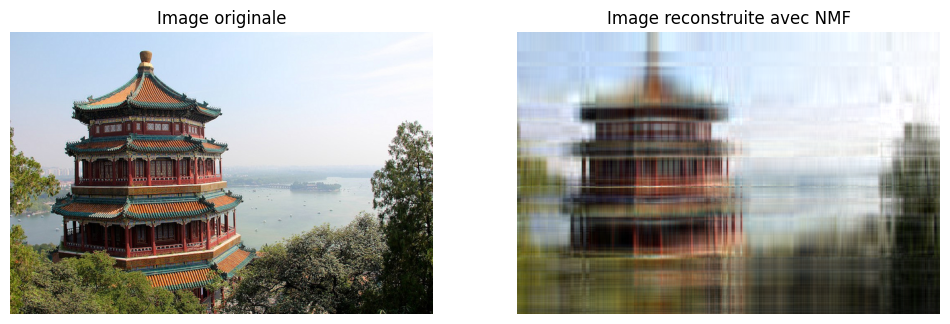

In [7]:
# filepath: c:\Users\michel.bertrand.mama\Documents\AYNID\clustering_dimension_reduction.ipynb
from sklearn.decomposition import NMF
from sklearn.datasets import load_sample_image
import matplotlib.pyplot as plt
import numpy as np

# Charger une image d'exemple
china = load_sample_image('china.jpg')
X = china.astype('float32') / 255
X = X.reshape((427, 640 * 3))

# Créer un modèle NMF avec 10 composantes
nmf = NMF(n_components=10, init='random', random_state=0)

# Entraîner le modèle
W = nmf.fit_transform(X)
H = nmf.components_

# Reconstruire l'image
X_reconstructed = np.dot(W, H)
X_reconstructed = X_reconstructed.reshape((427, 640, 3))

# Afficher l'image originale et l'image reconstruite
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(china)
plt.title('Image originale')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(X_reconstructed)
plt.title('Image reconstruite avec NMF')
plt.axis('off')

plt.show()